<a href="https://colab.research.google.com/github/DMadhumita2904/Adobe-Gensolve/blob/main/Adobe_GenSolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Frag0 Regularizing Model**

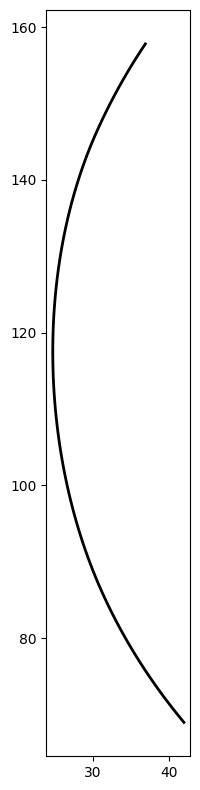

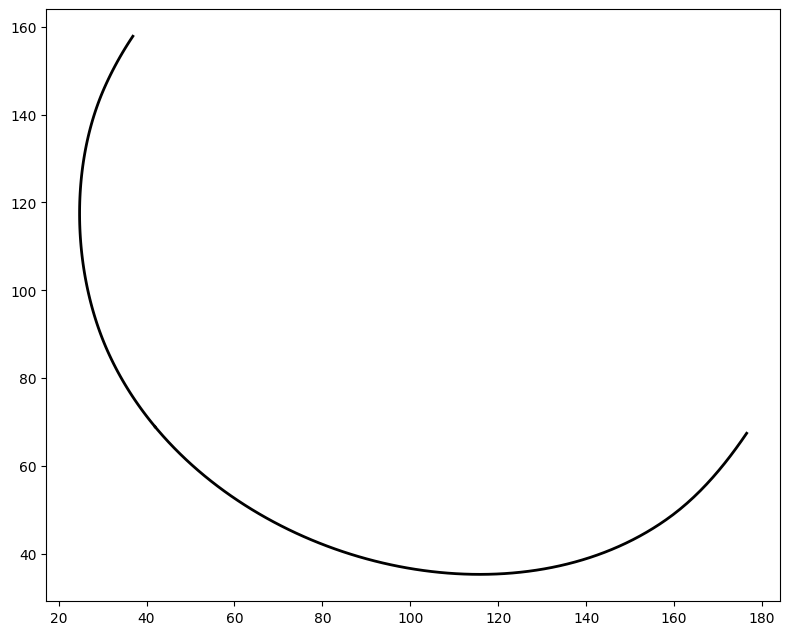

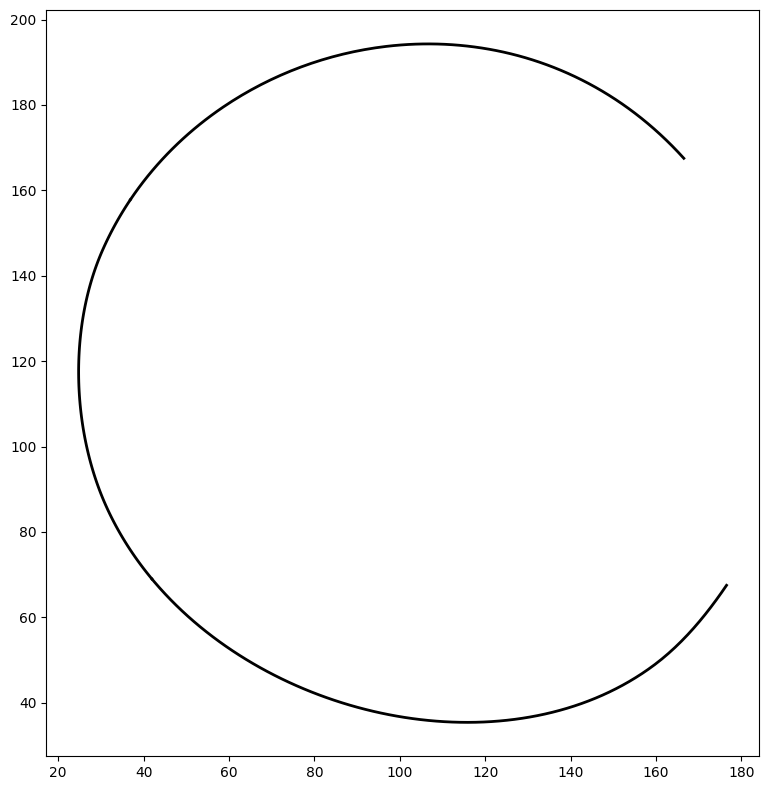

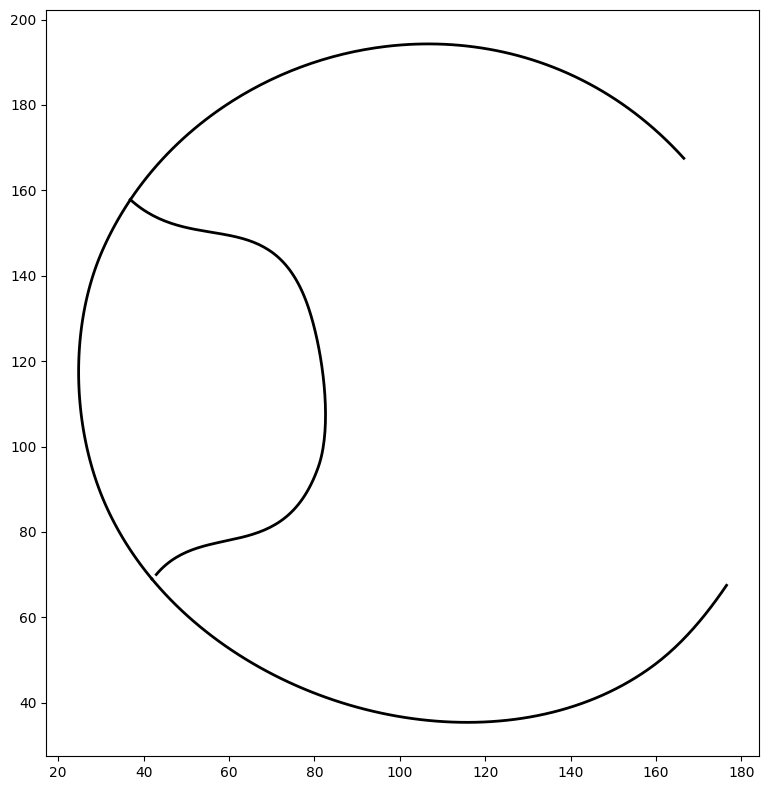

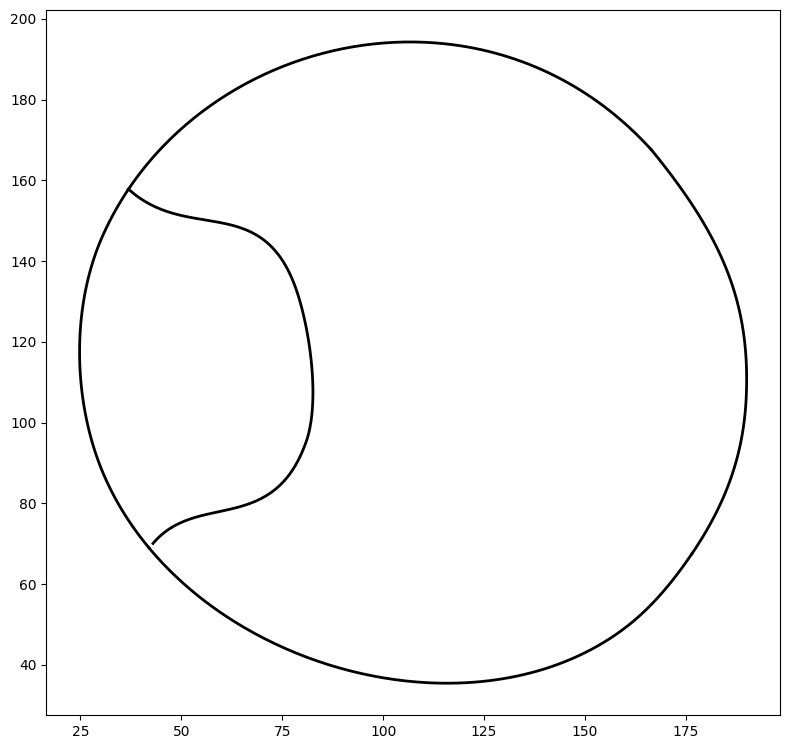

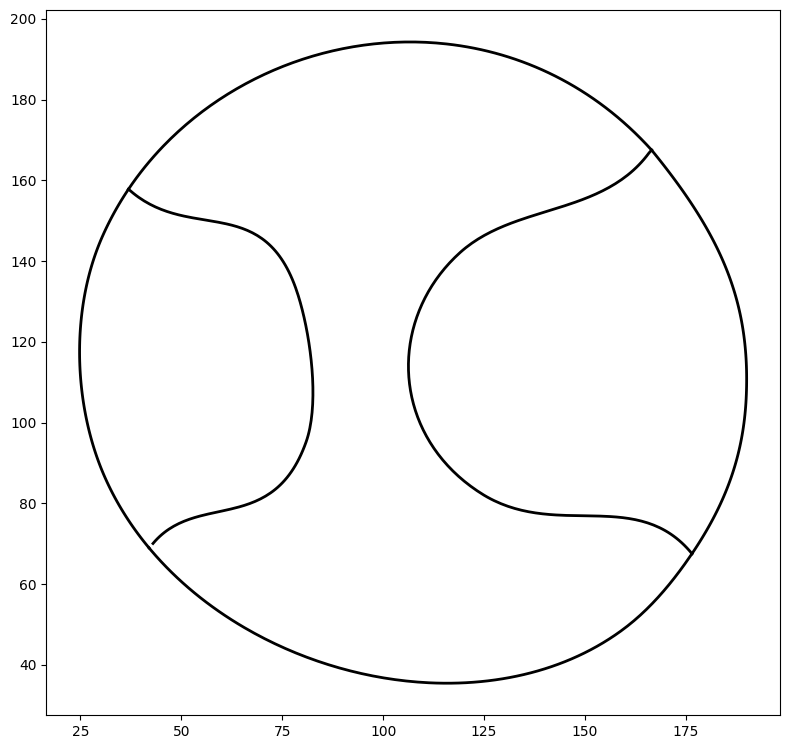

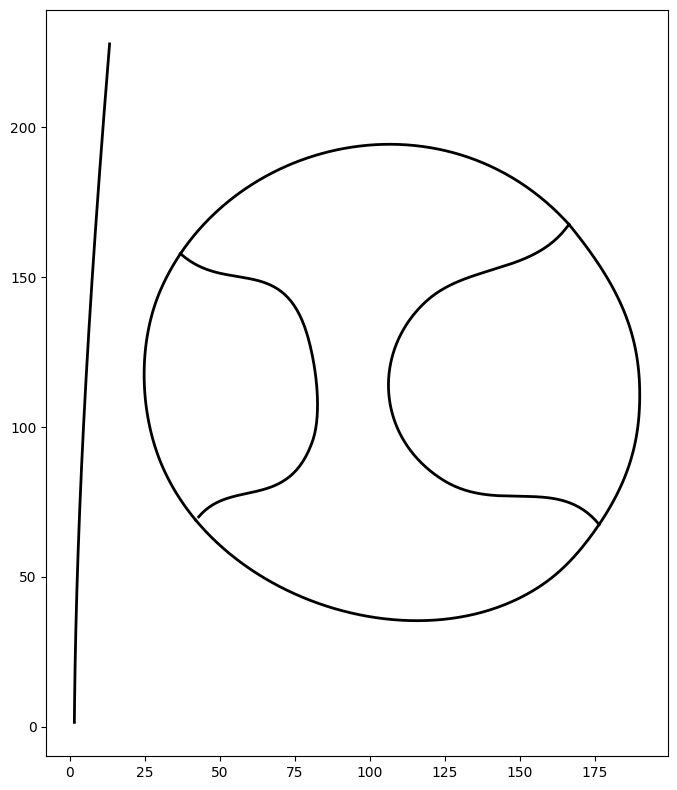

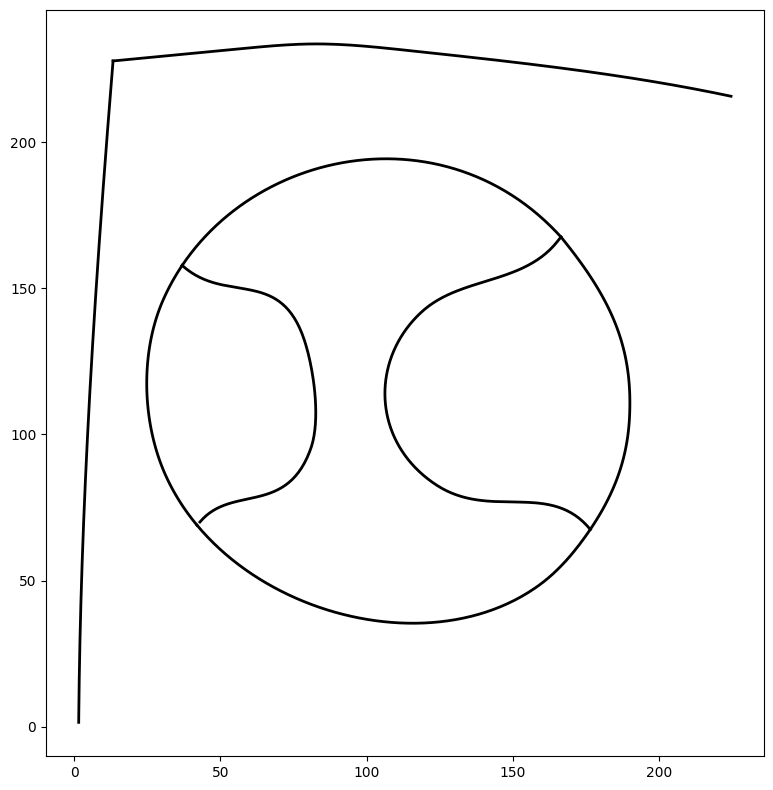

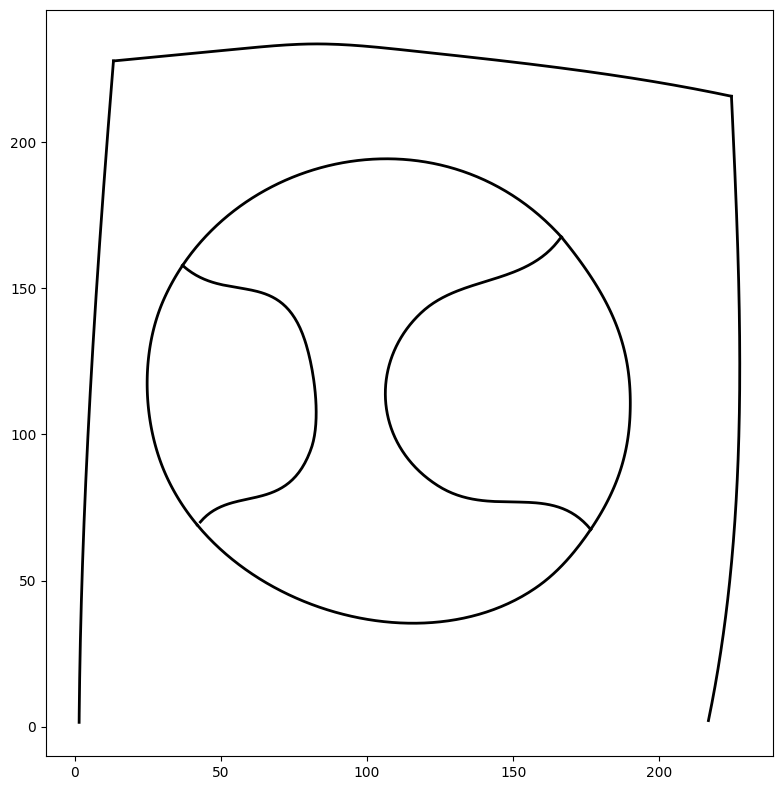

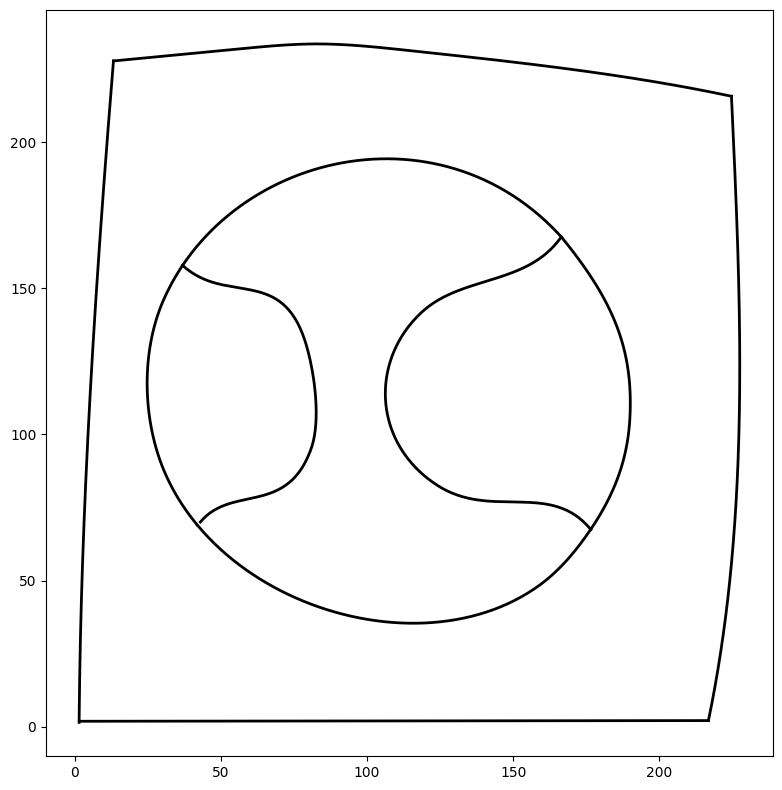

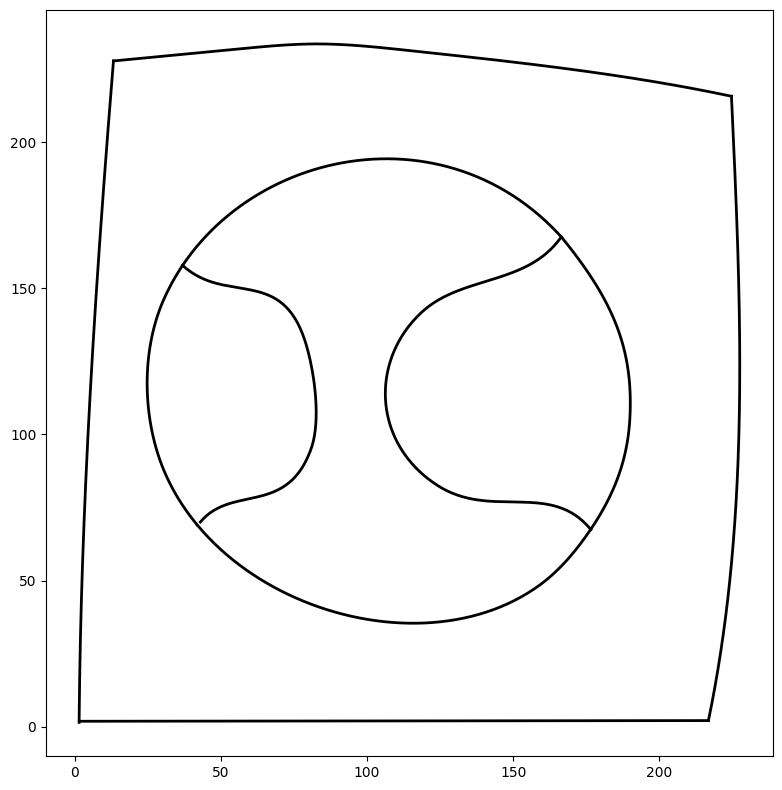

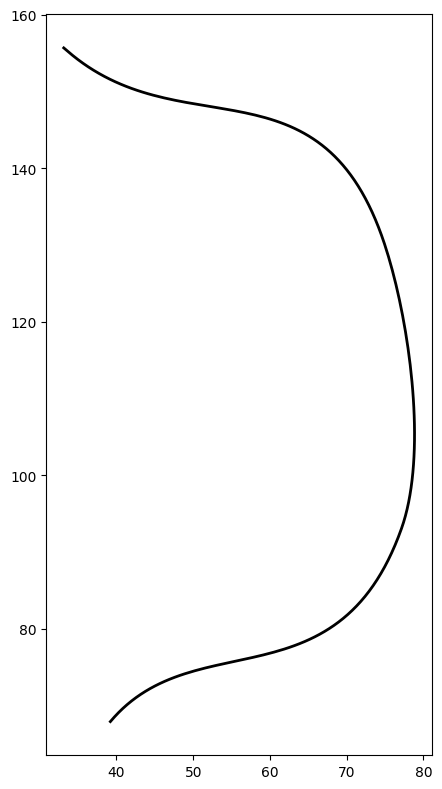

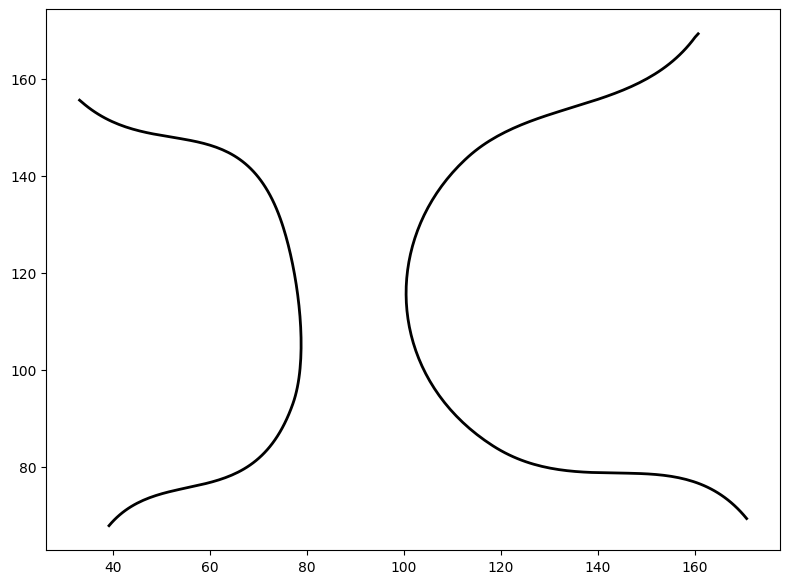

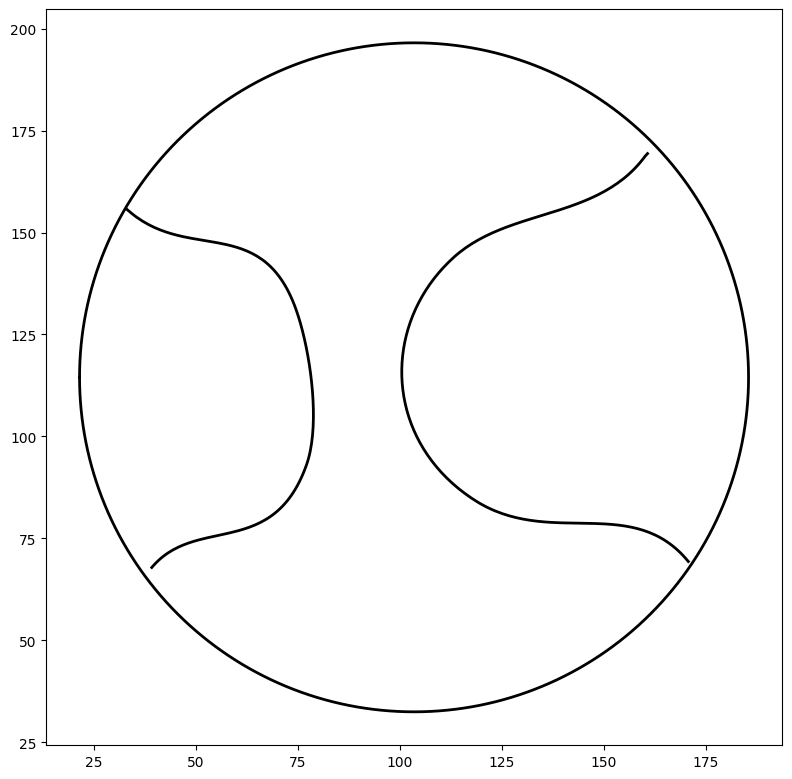

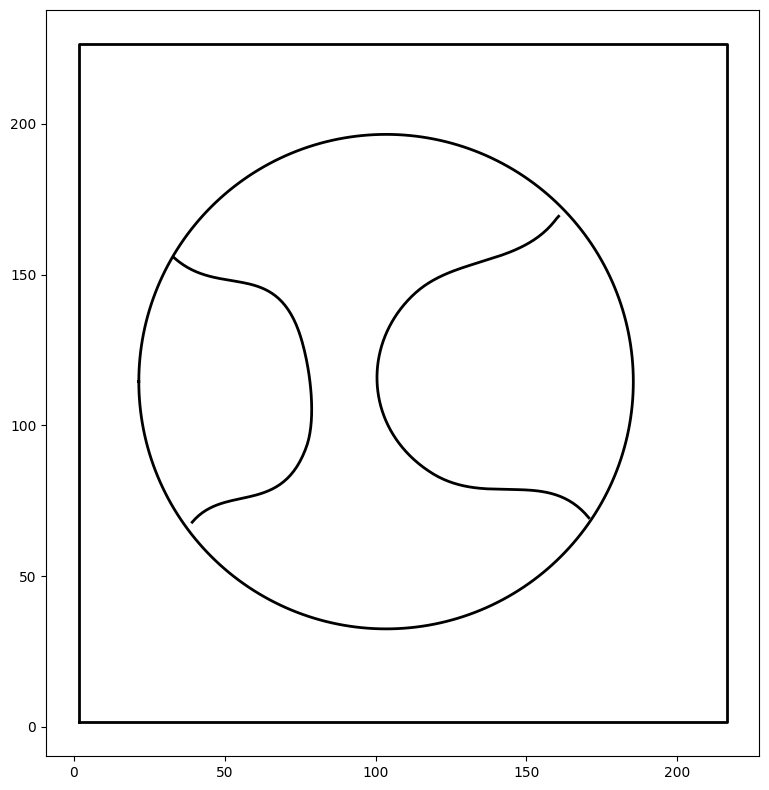

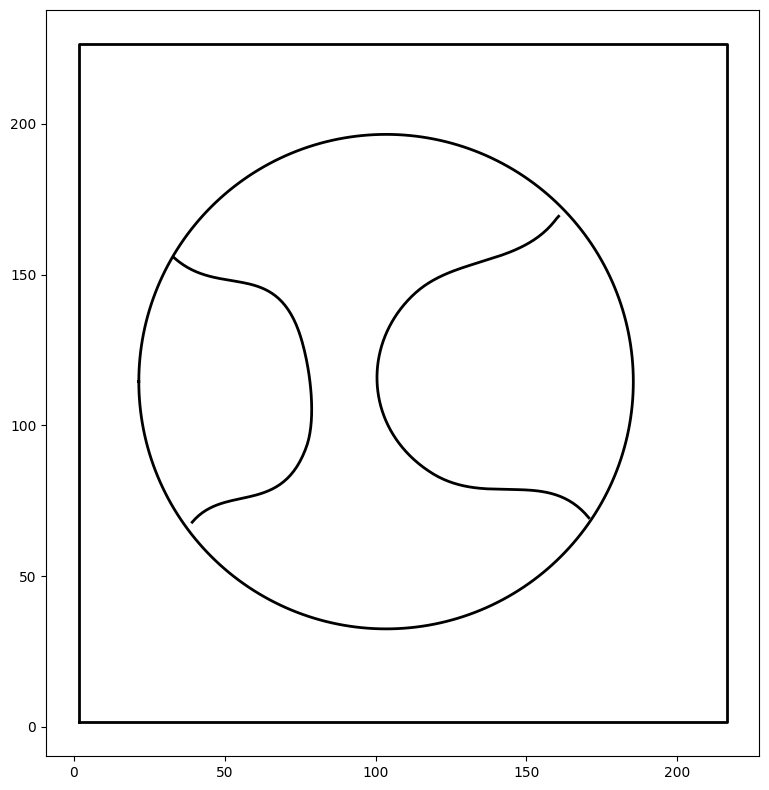

In [1]:
import numpy as np

# Loading data from CSV files
data_XYs = np.genfromtxt(r"/content/frag0.csv", delimiter=',')
data_XY2s = np.genfromtxt(r"/content/frag01_sol.csv", delimiter=',')

# Determining the unique path count
num_paths_XYs = len(np.unique(data_XYs[:, 0]))
num_paths_XY2s = len(np.unique(data_XY2s[:, 0]))

# Extracting XY data for the first set
paths_XYs = []
for i in range(num_paths_XYs):
    path = data_XYs[data_XYs[:, 0] == i][:, 2:]
    paths_XYs.append(path)

# Extracting XY data for the second set
paths_XY2s = []
for i in range(num_paths_XY2s):
    path = data_XY2s[data_XY2s[:, 0] == i][:, 2:]
    paths_XY2s.append(path)

import matplotlib.pyplot as plt

# Plotting the first set of paths step-by-step
for i in range(num_paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for j in range(i + 1):
        ax.plot(paths_XYs[j][:, 0], paths_XYs[j][:, 1], color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Plotting all the paths from the first set together
fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
for i in range(num_paths_XYs):
    ax.plot(paths_XYs[i][:, 0], paths_XYs[i][:, 1], color='black', linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Plotting the second set of paths step-by-step
for i in range(num_paths_XY2s):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for j in range(i + 1):
        ax.plot(paths_XY2s[j][:, 0], paths_XY2s[j][:, 1], color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Plotting all the paths from the second set together
fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
for i in range(num_paths_XY2s):
    ax.plot(paths_XY2s[i][:, 0], paths_XY2s[i][:, 1], color='black', linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

**Frag1 Regularizing Model**

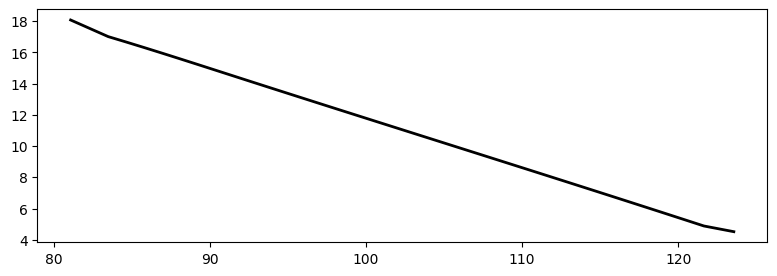

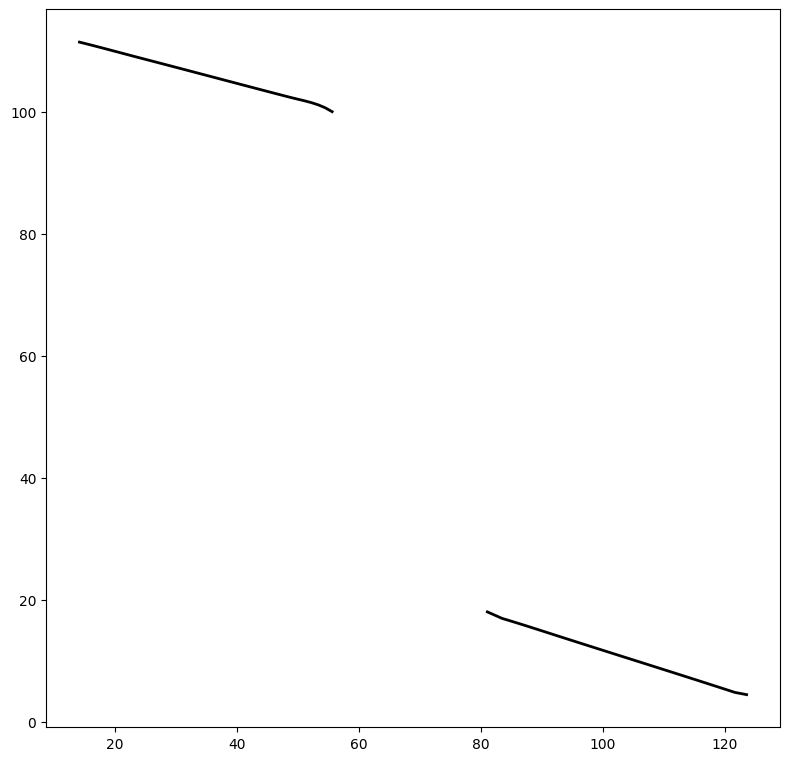

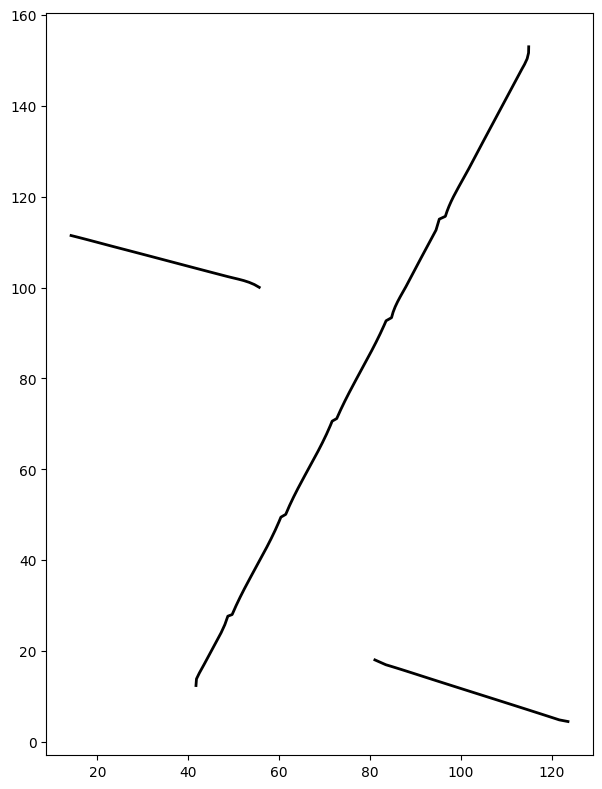

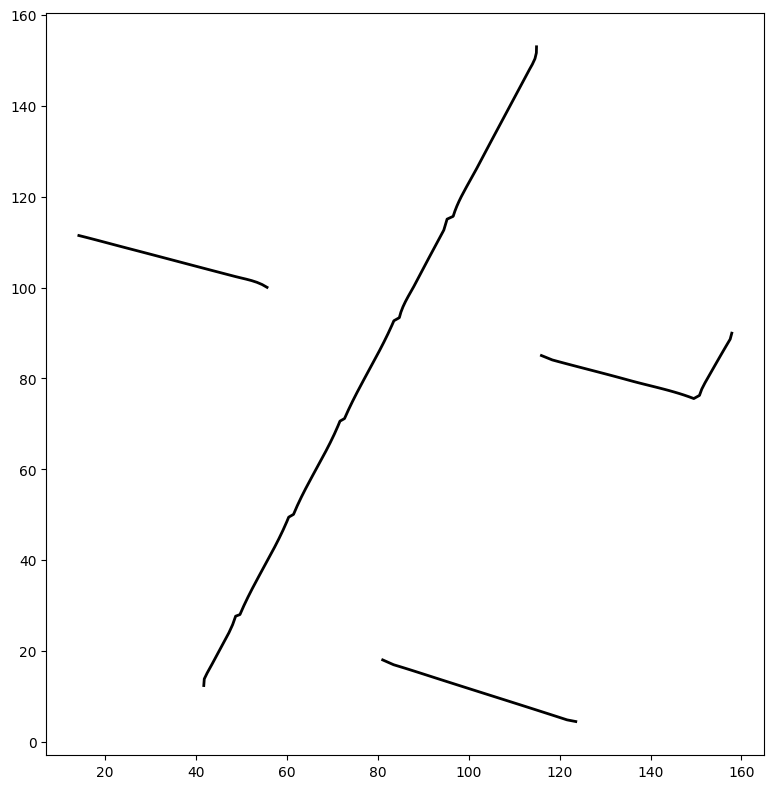

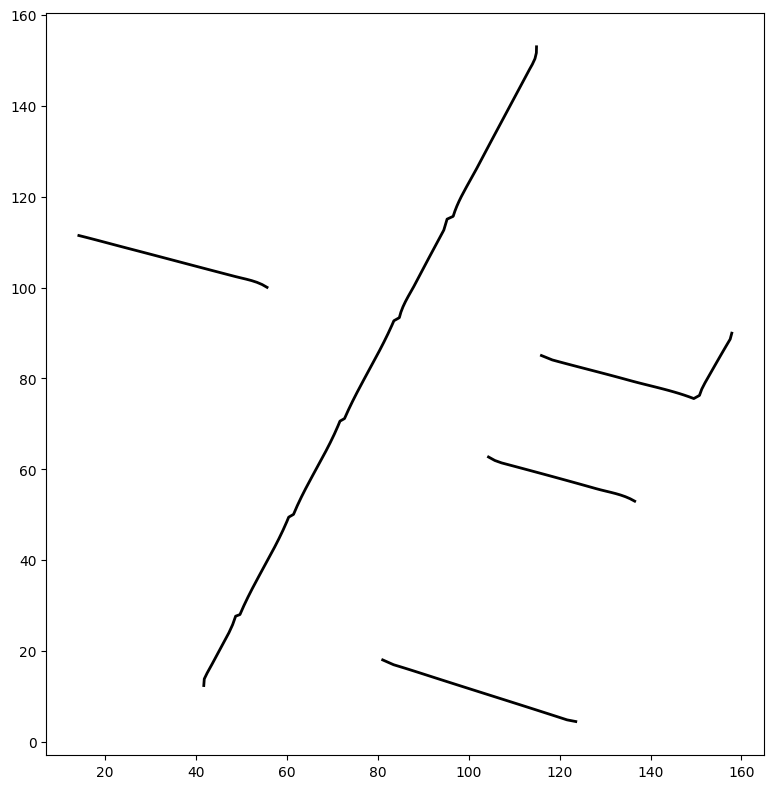

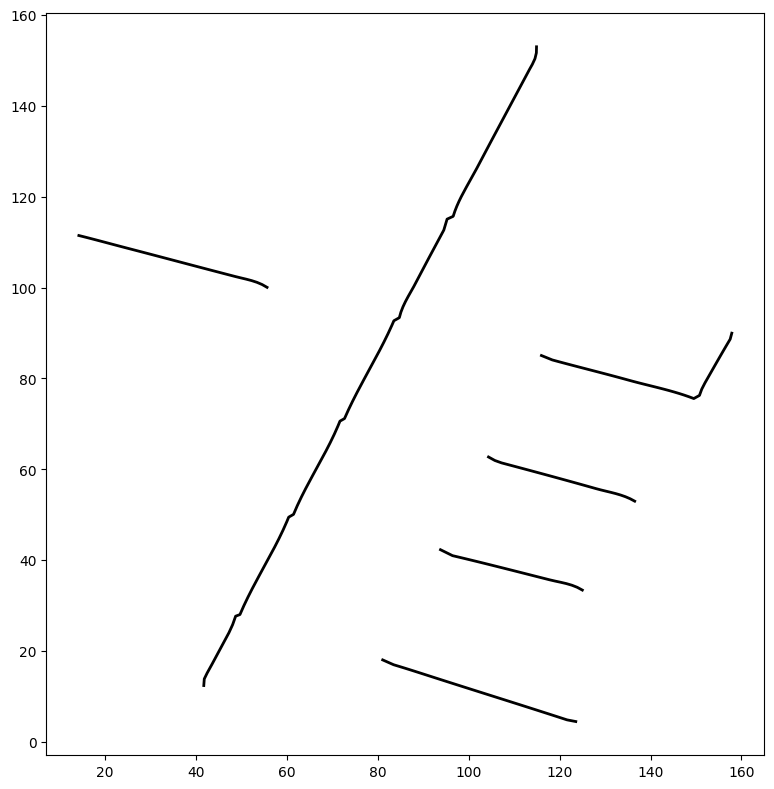

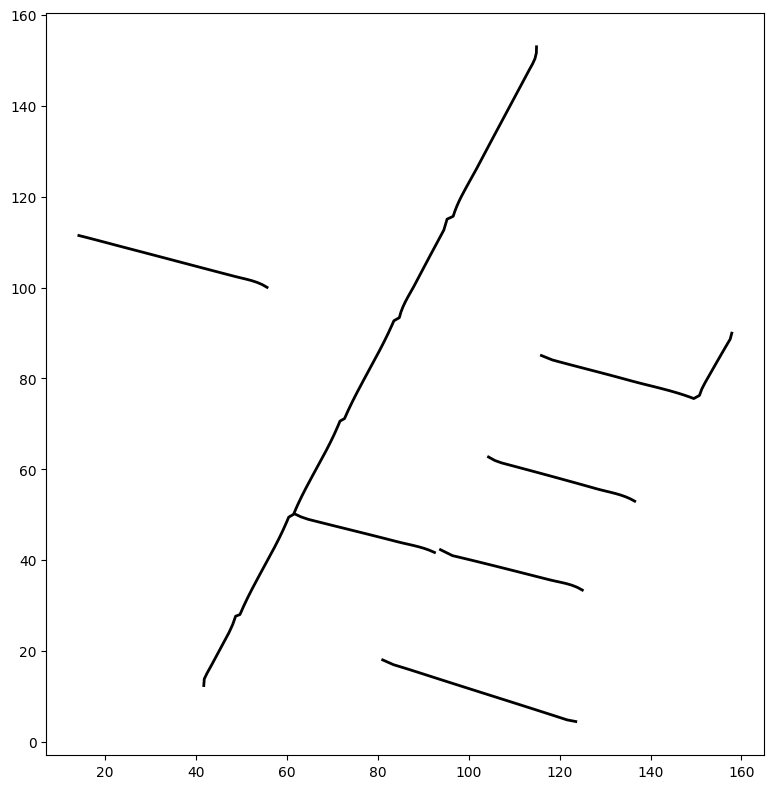

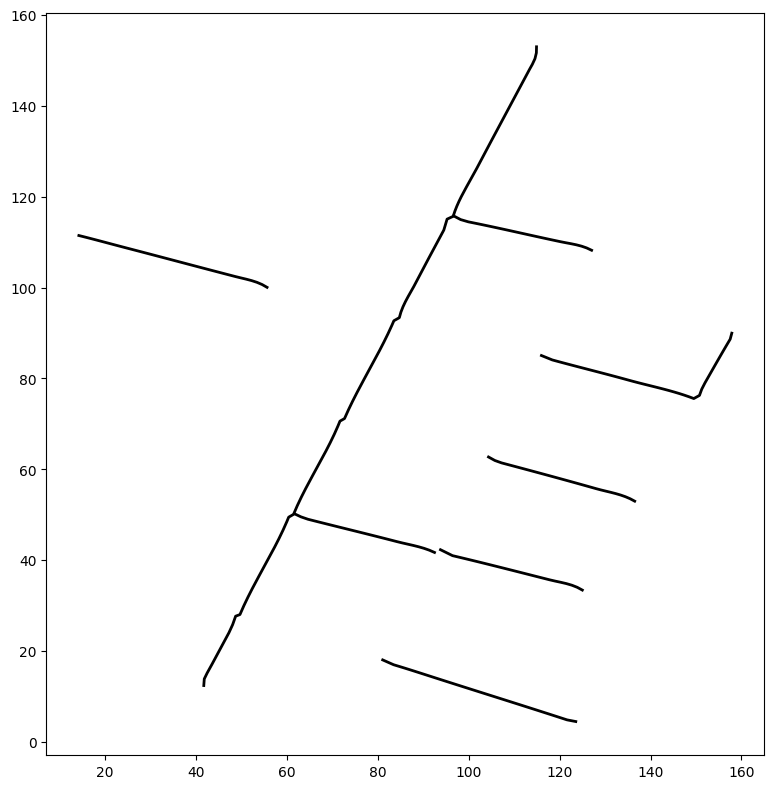

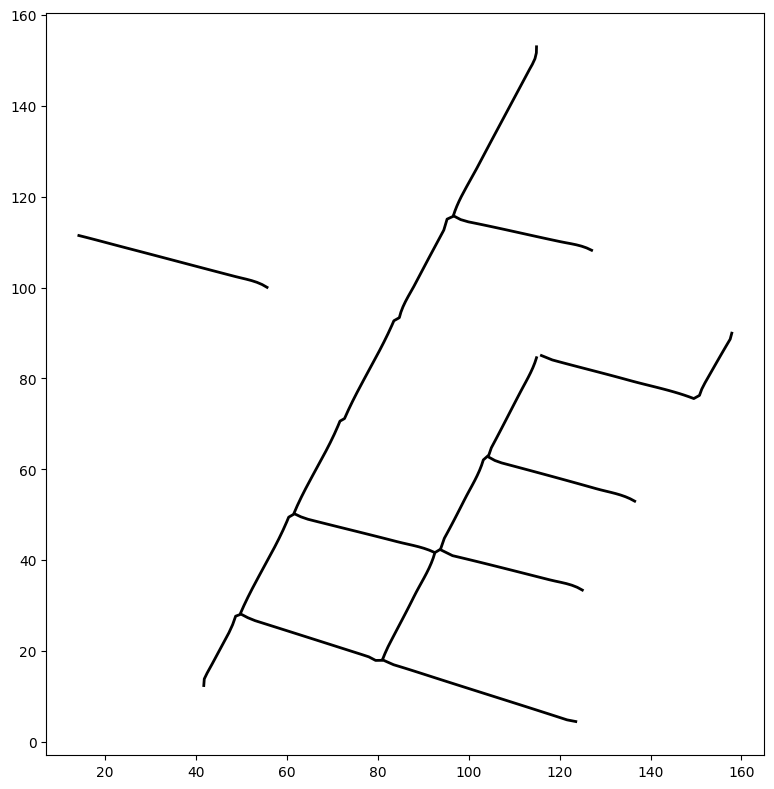

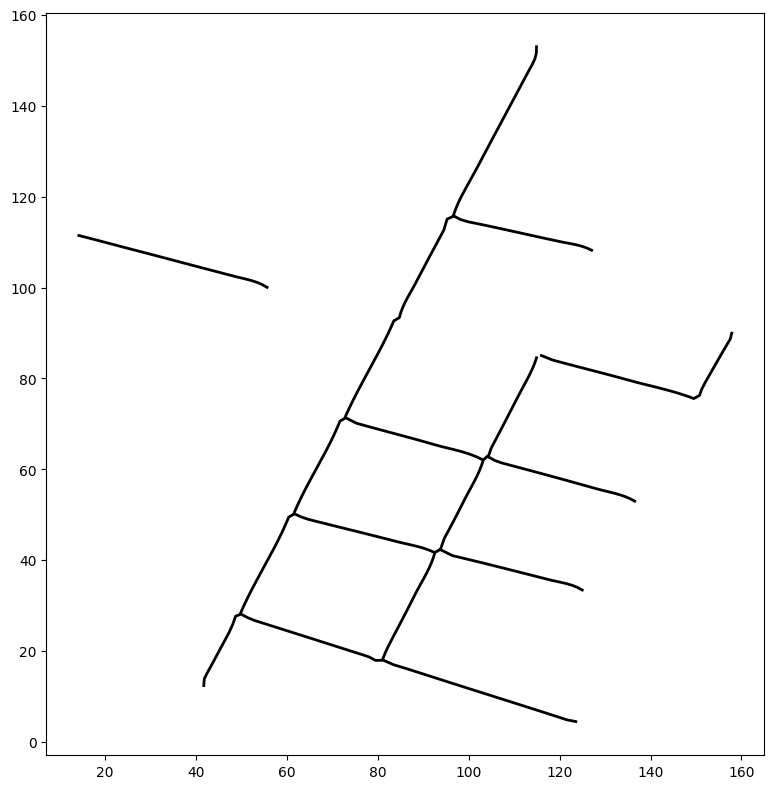

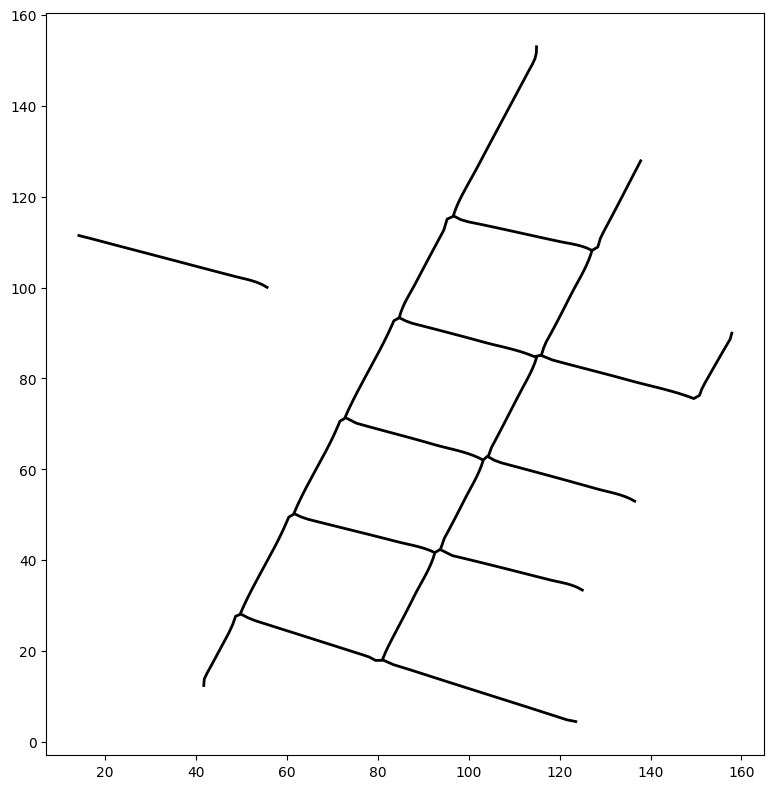

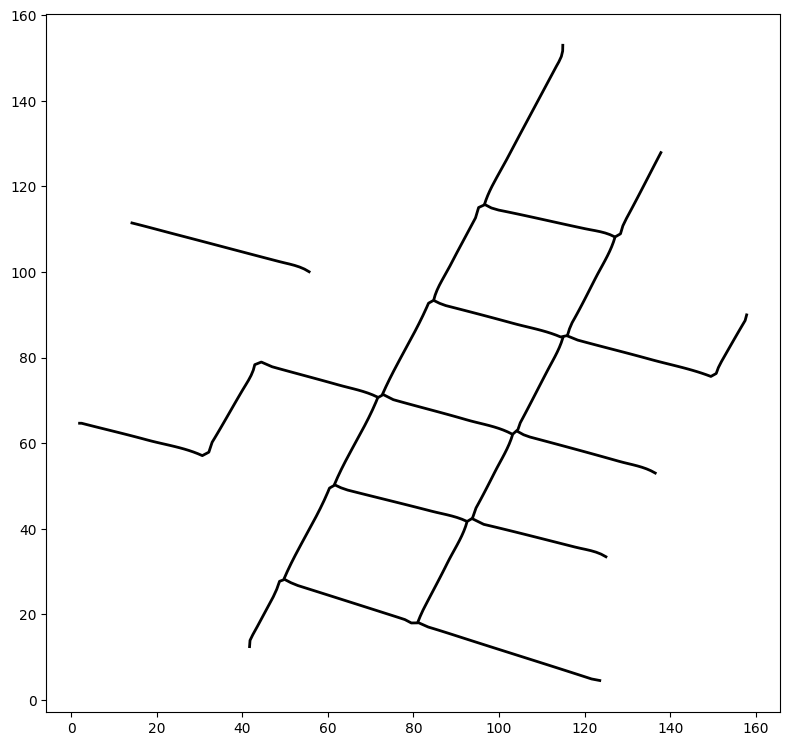

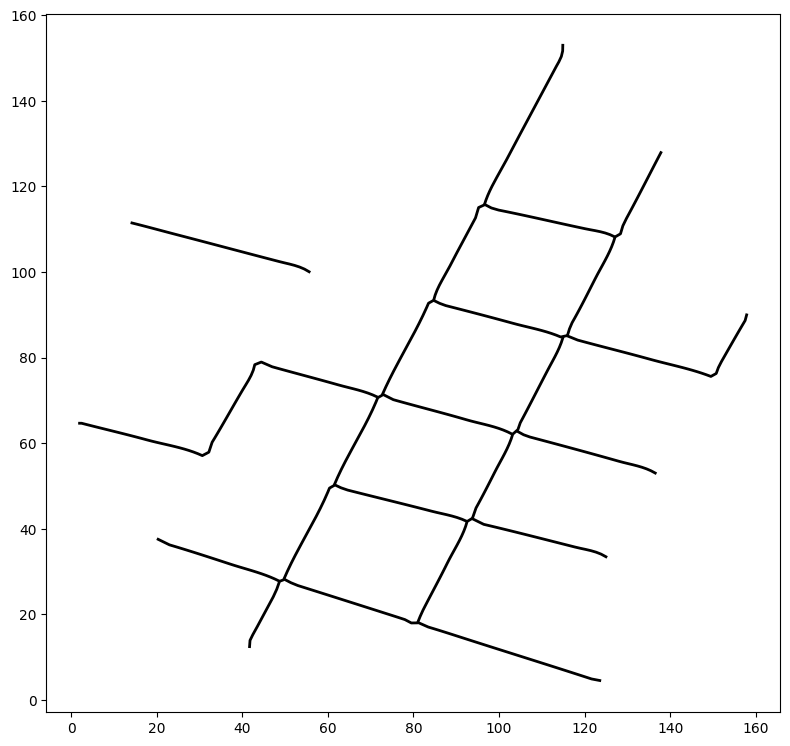

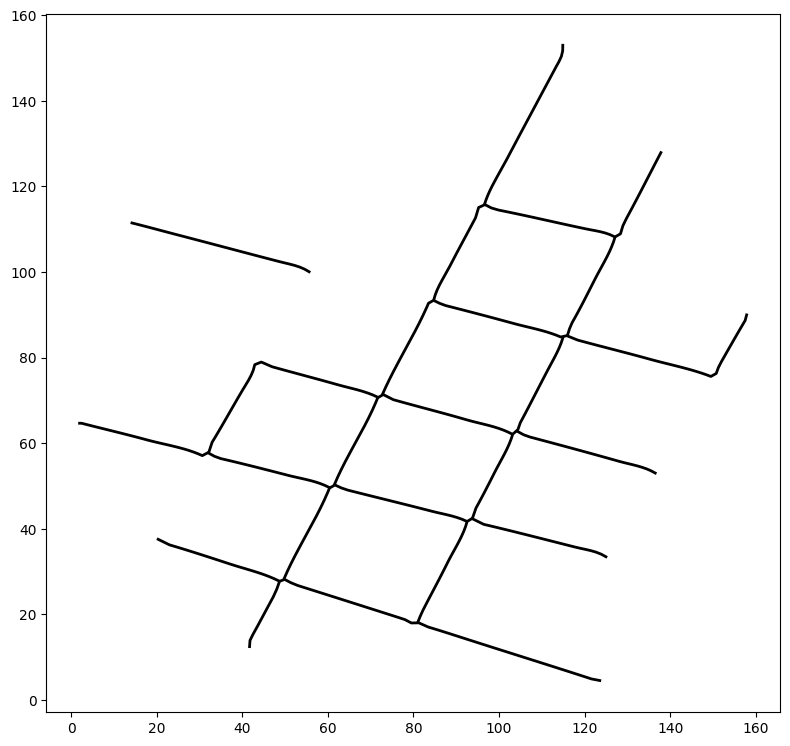

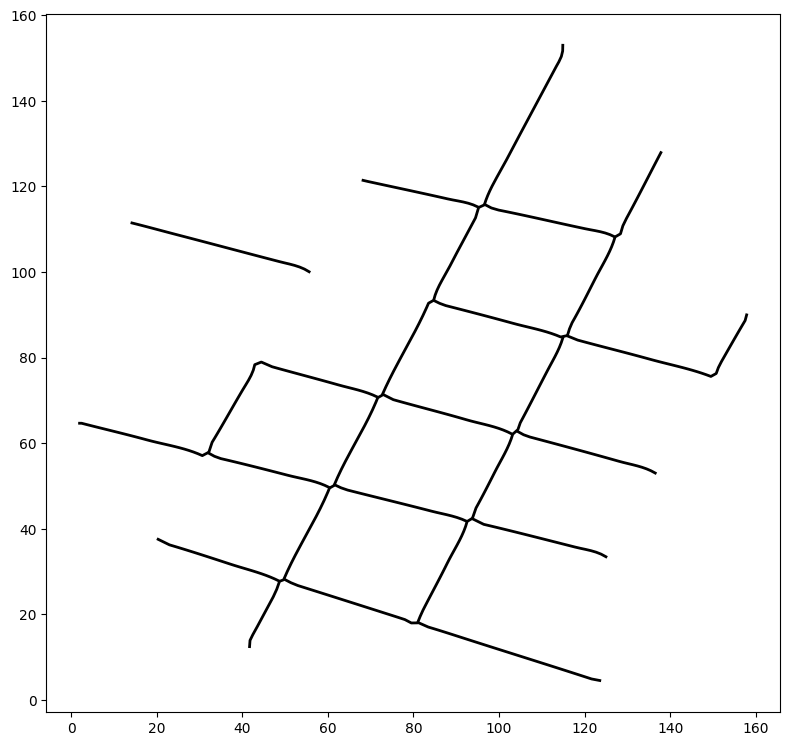

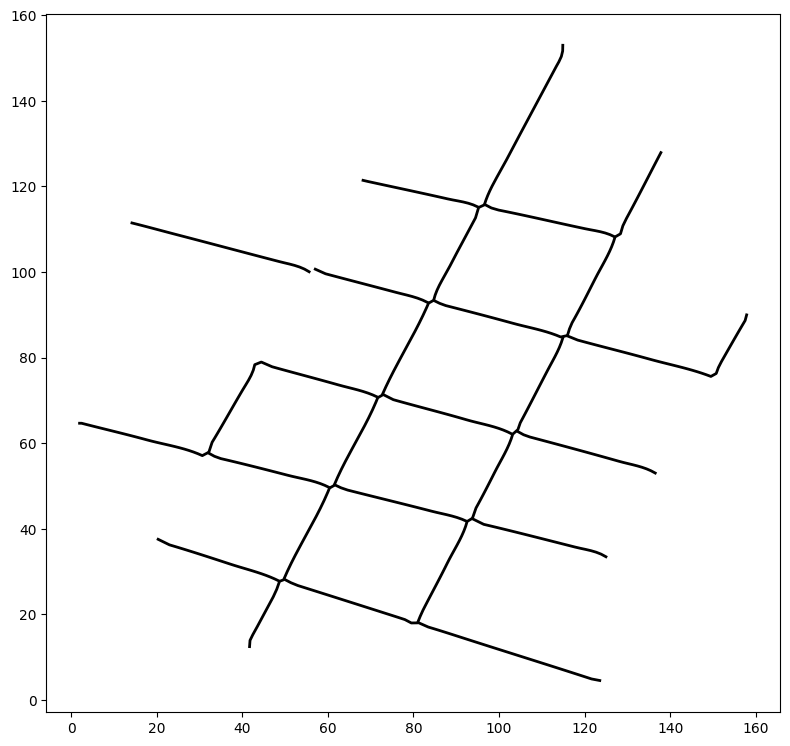

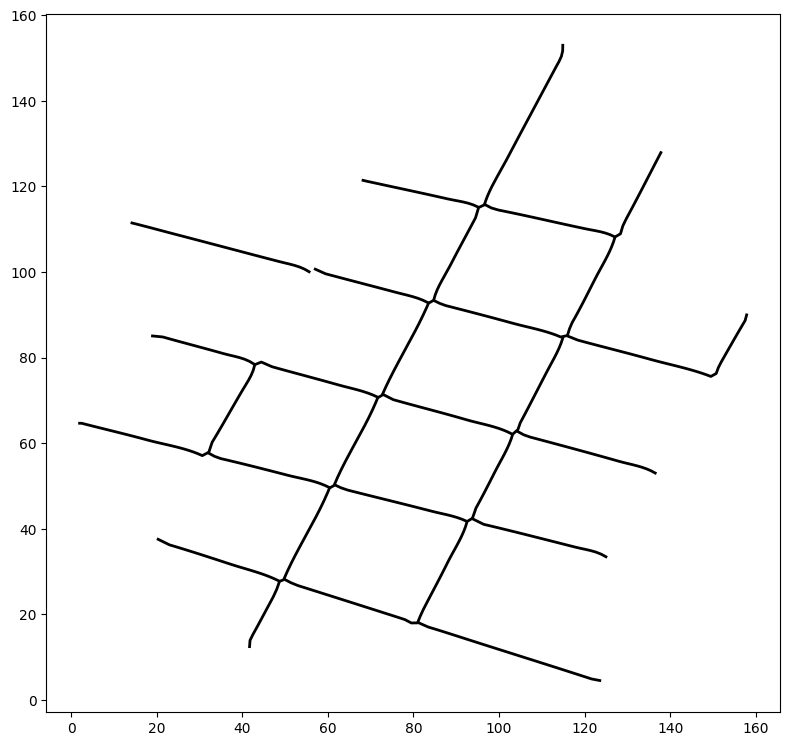

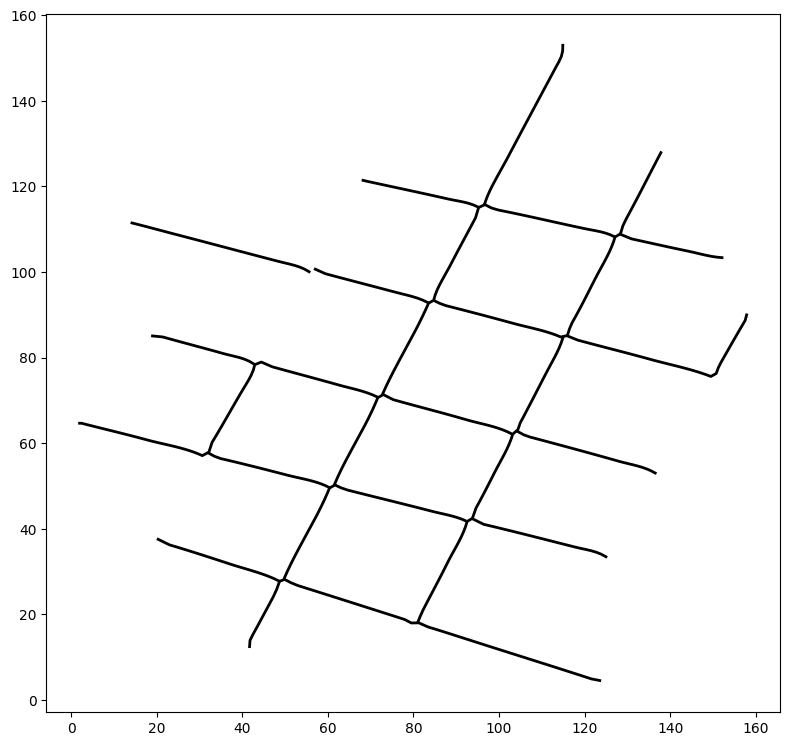

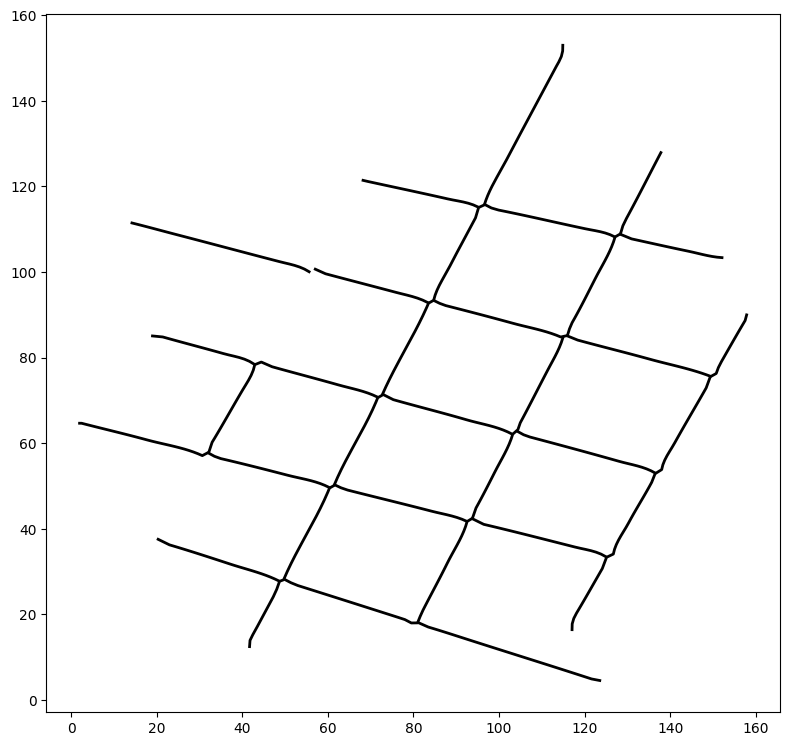

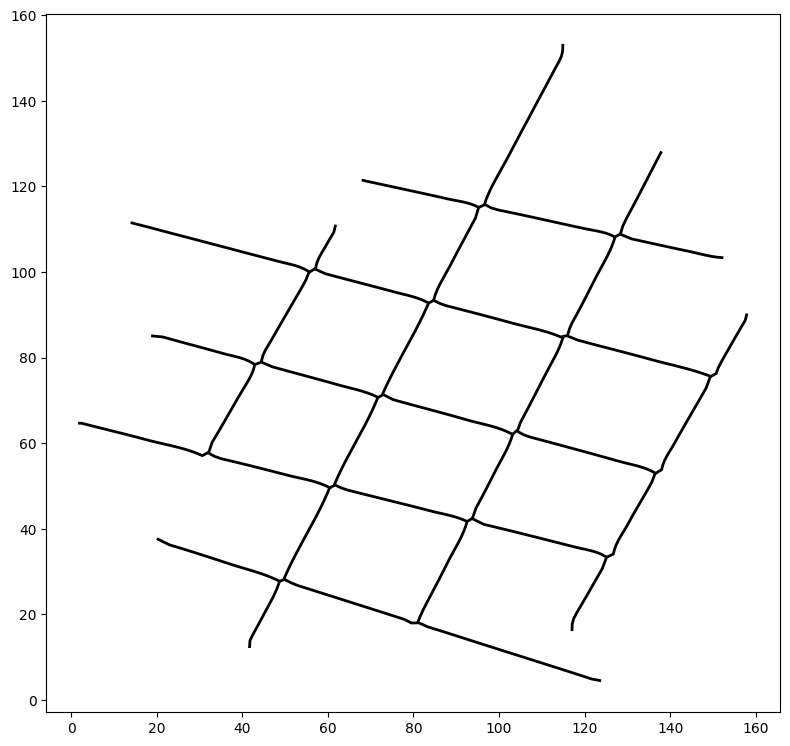

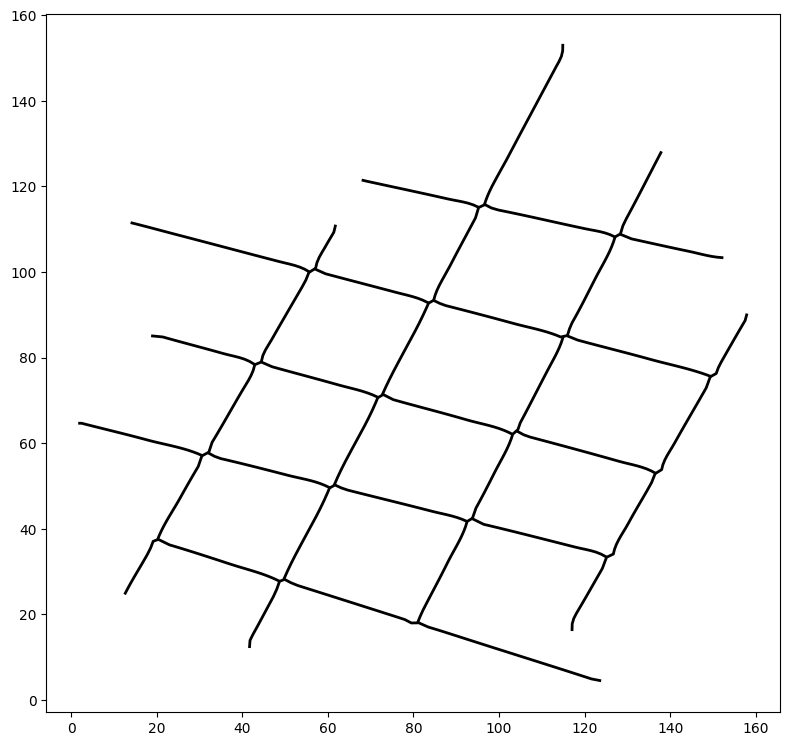

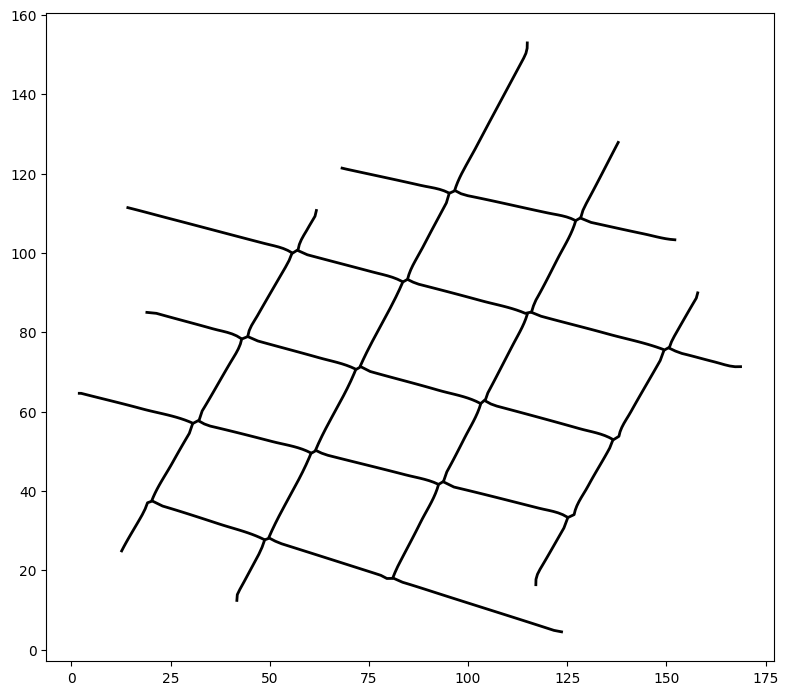

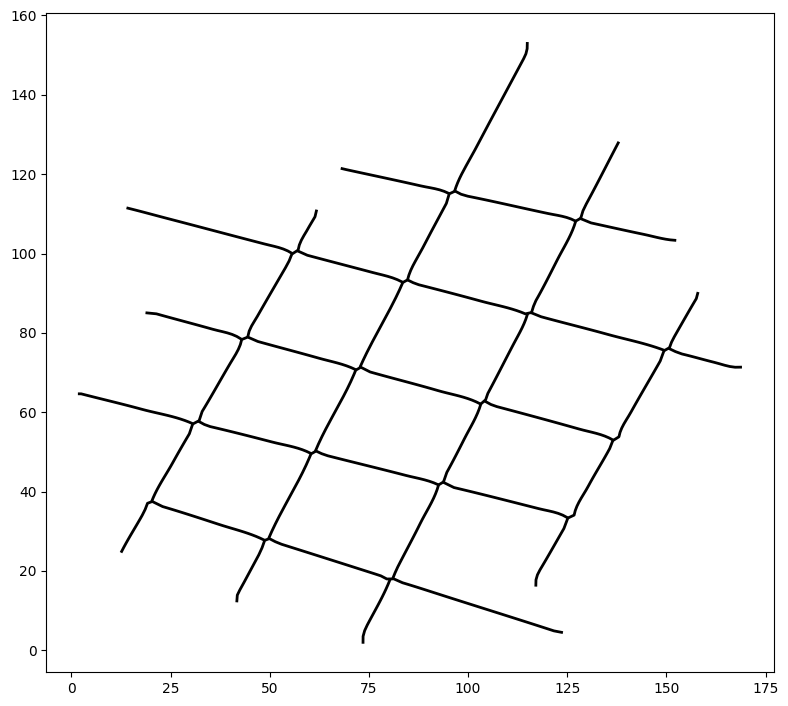

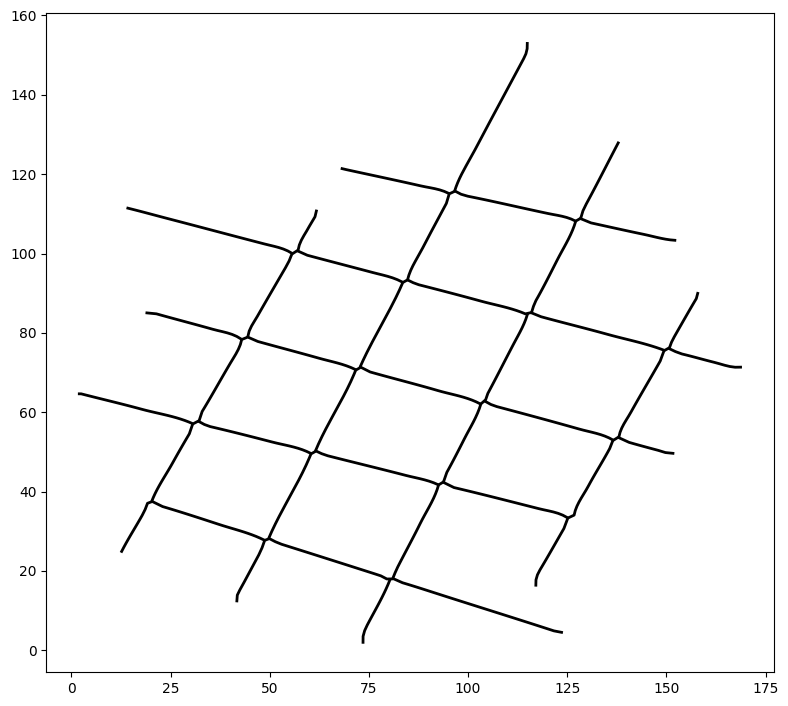

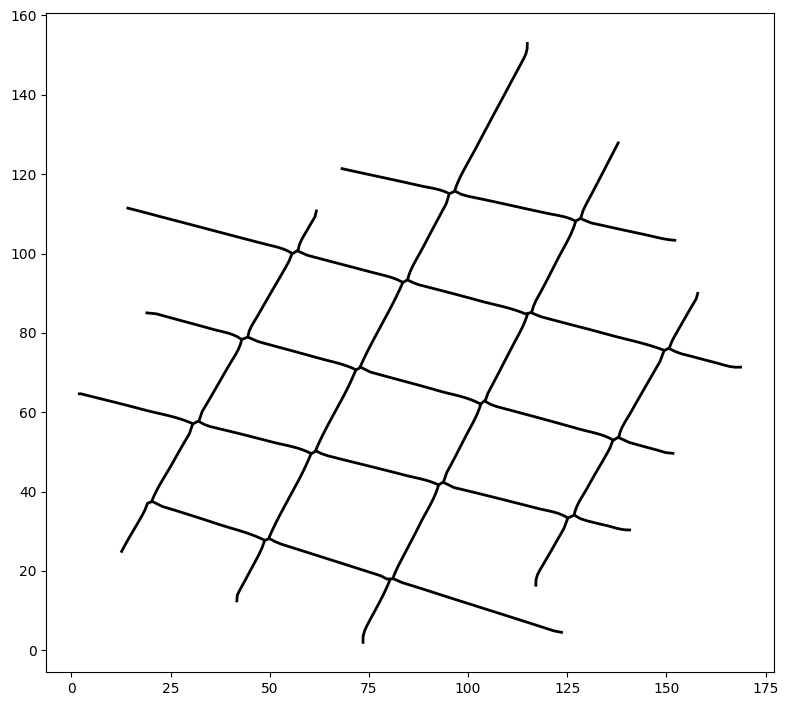

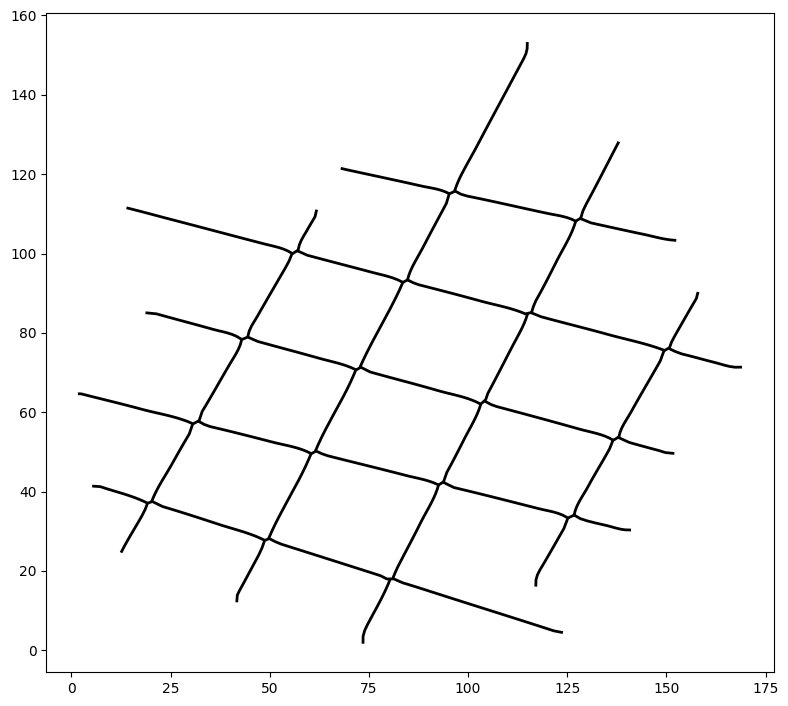

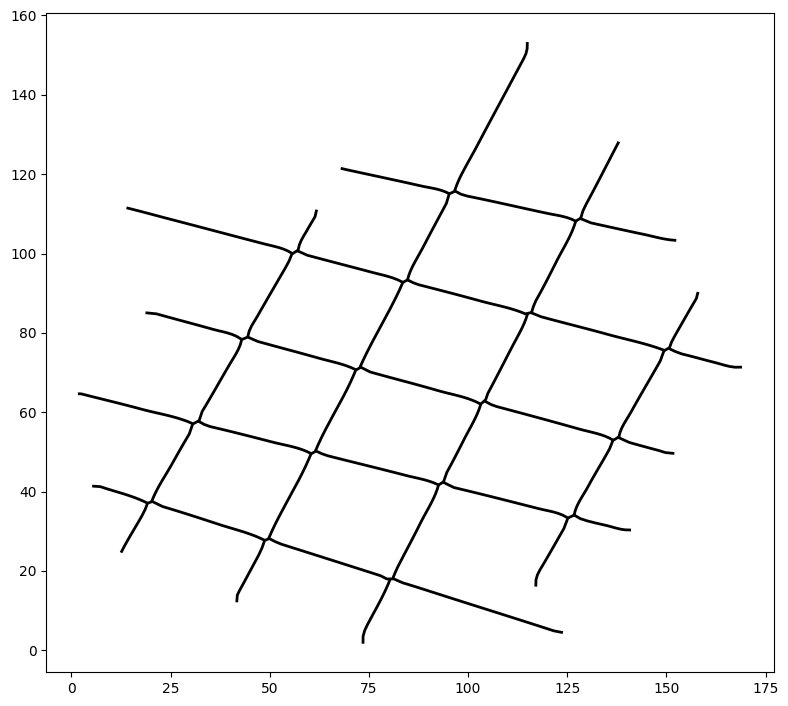

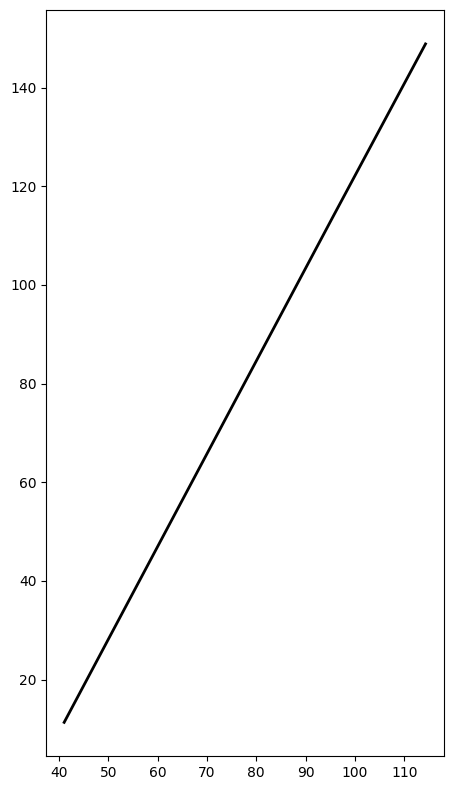

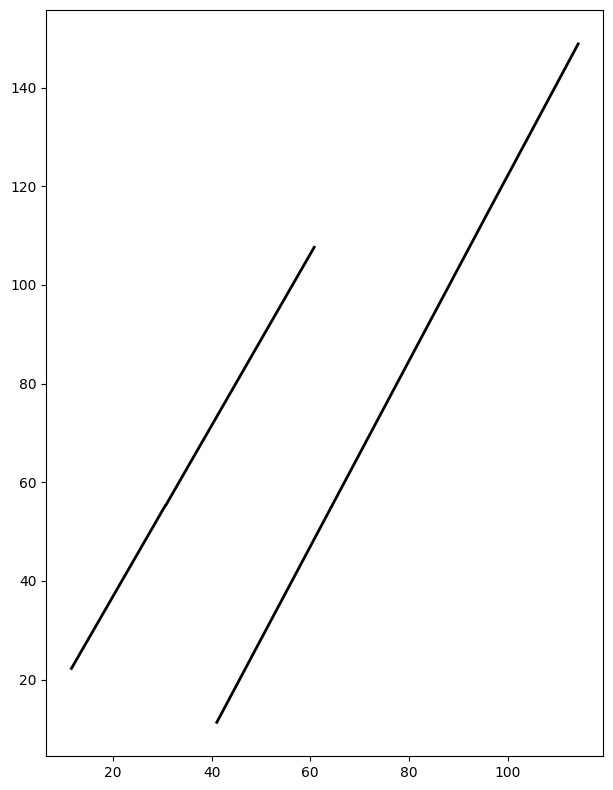

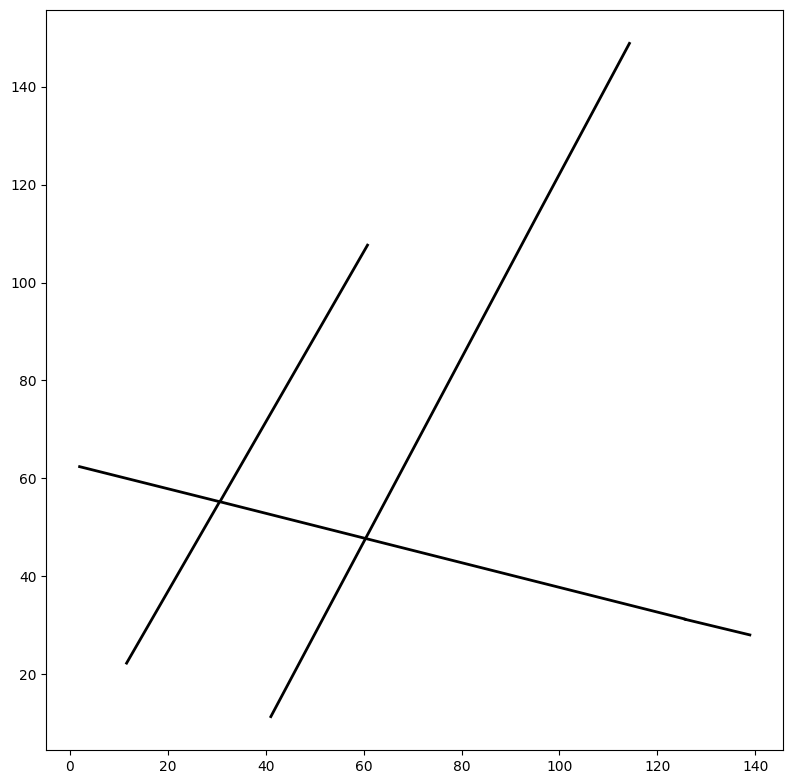

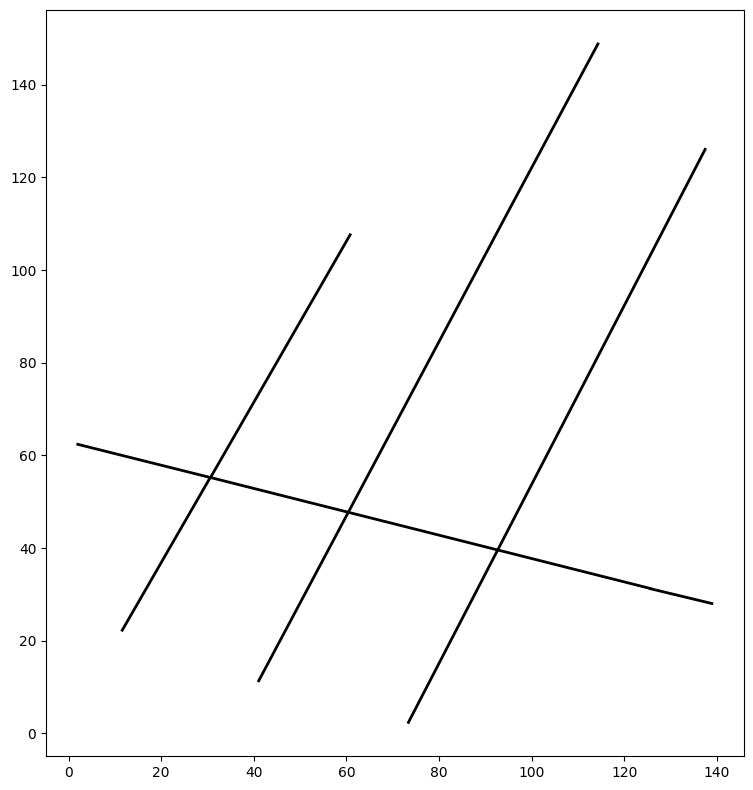

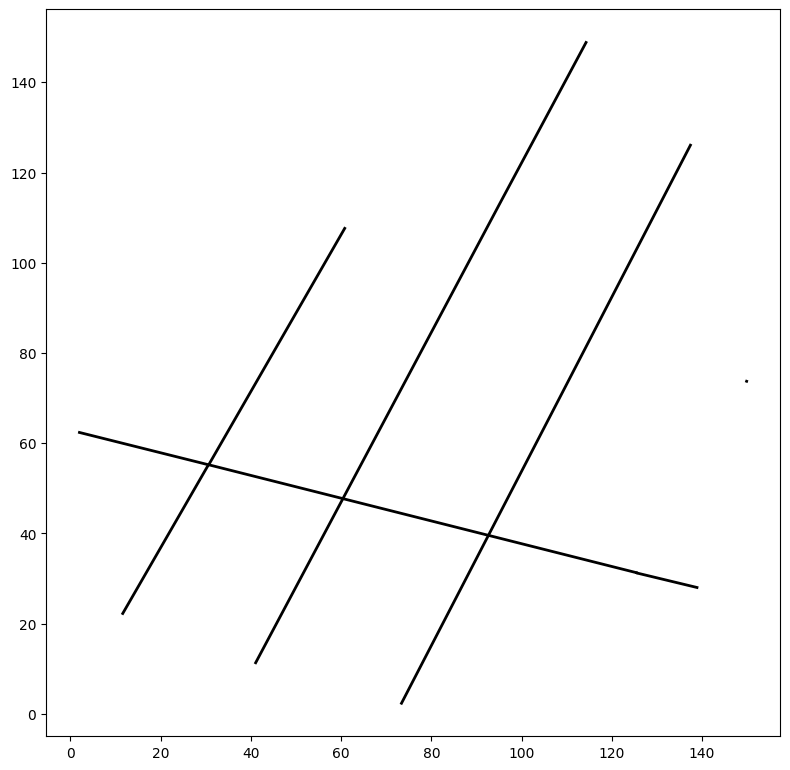

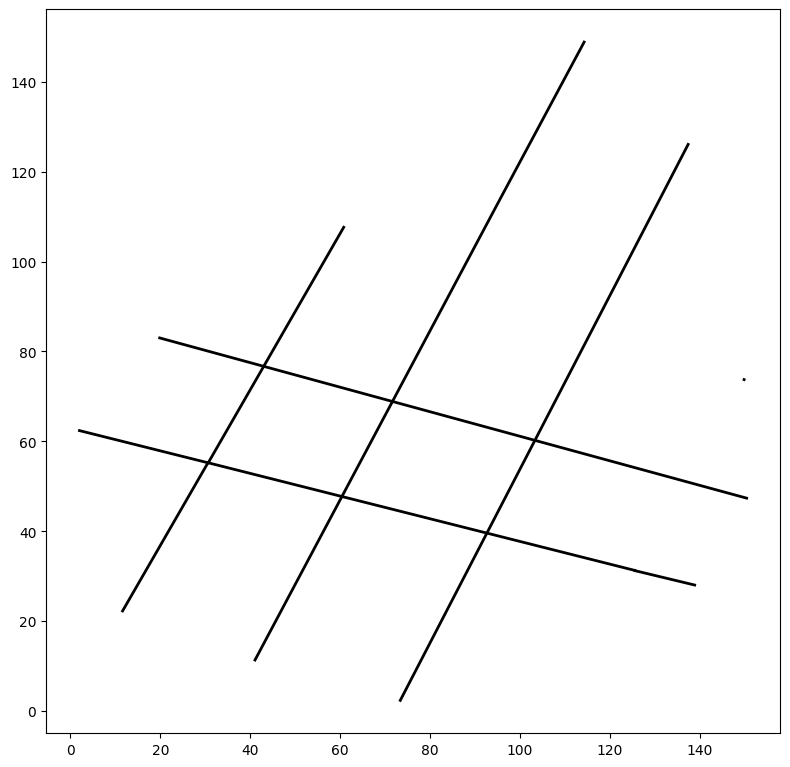

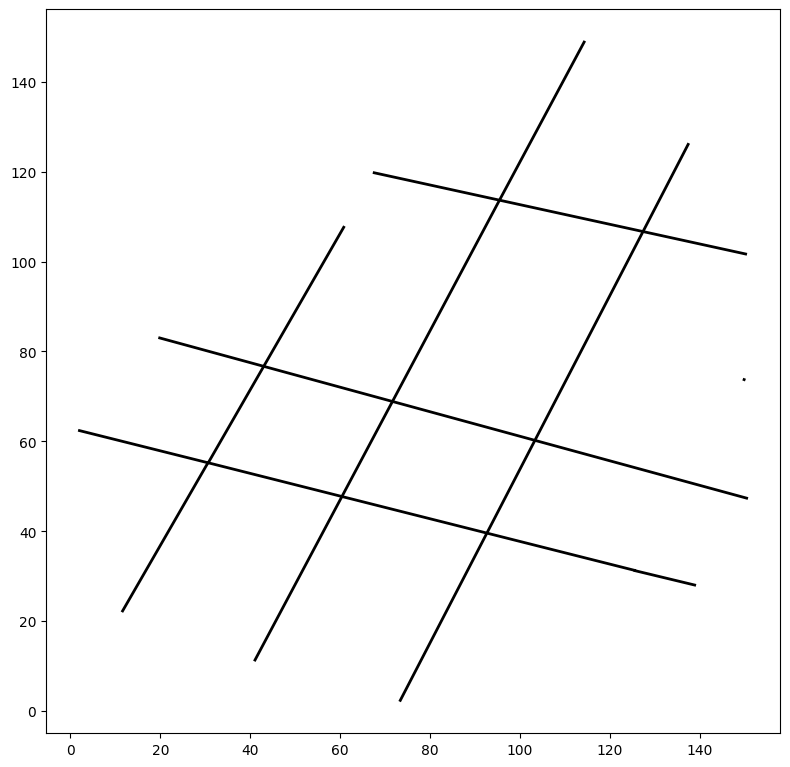

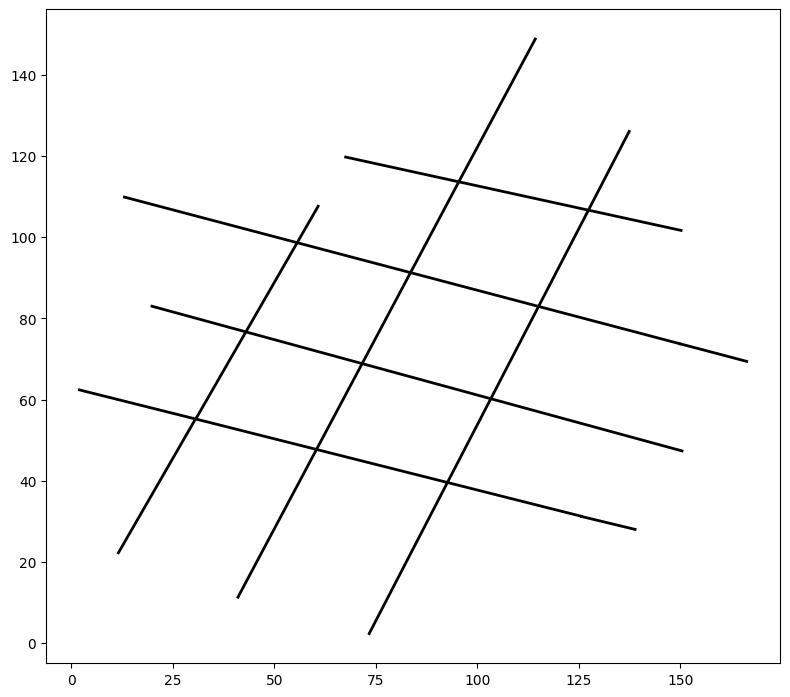

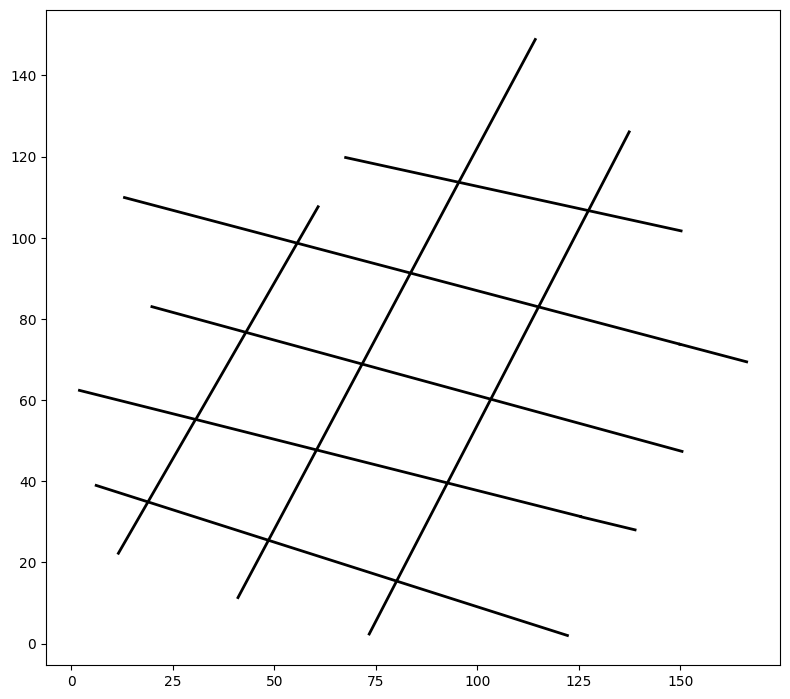

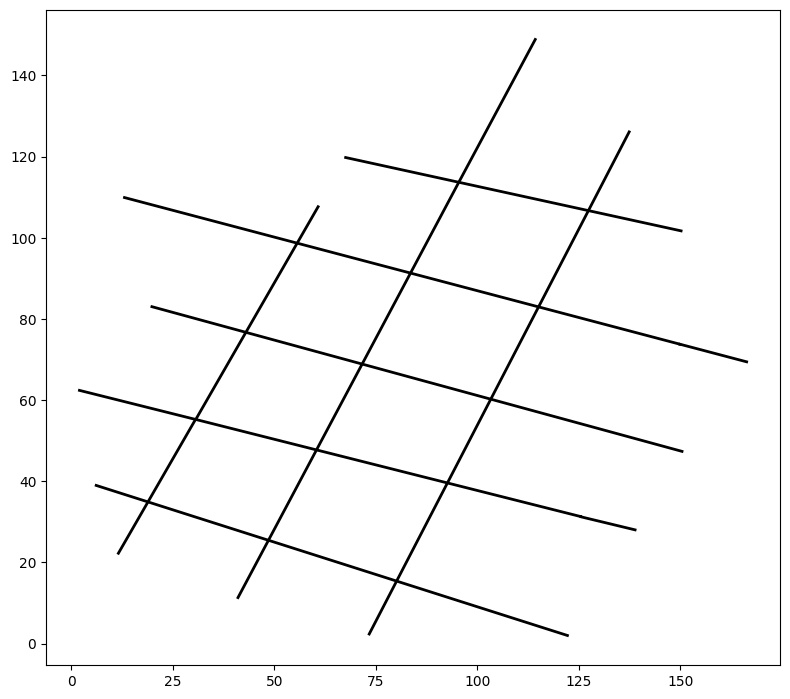

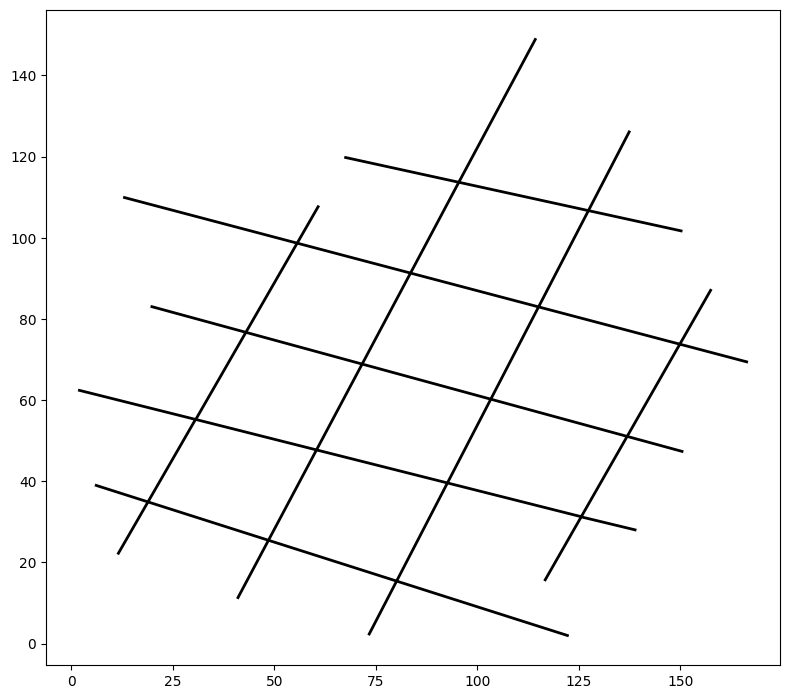

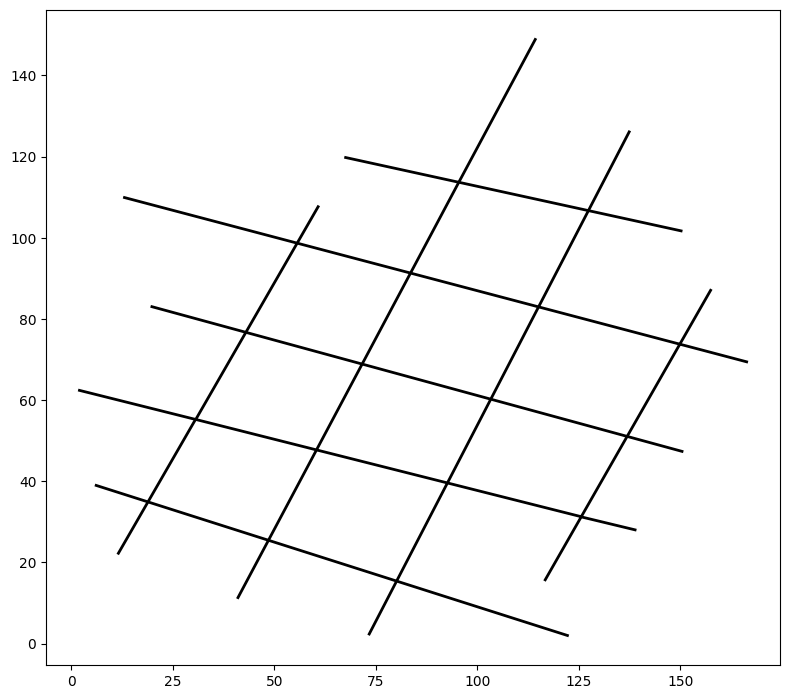

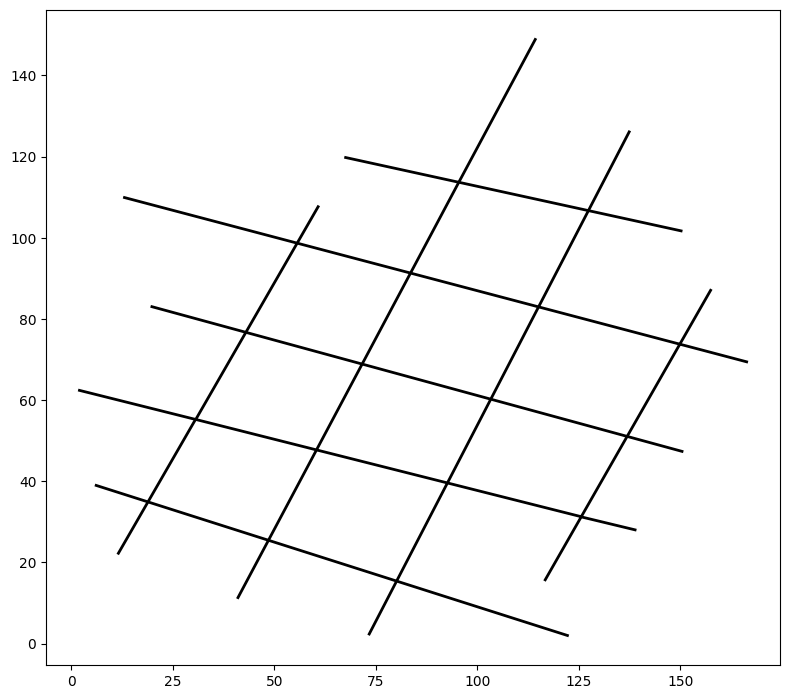

In [2]:
import numpy as np

# Loading data from CSV files
data_XYs = np.genfromtxt(r"/content/frag2.csv", delimiter=',')
data_XY2s = np.genfromtxt(r"/content/frag2_sol.csv", delimiter=',')

# Determining the unique path count
num_paths_XYs = len(np.unique(data_XYs[:, 0]))
num_paths_XY2s = len(np.unique(data_XY2s[:, 0]))

# Extracting XY data for the first set
paths_XYs = []
for i in range(num_paths_XYs):
    path = data_XYs[data_XYs[:, 0] == i][:, 2:]
    paths_XYs.append(path)

# Extracting XY data for the second set
paths_XY2s = []
for i in range(num_paths_XY2s):
    path = data_XY2s[data_XY2s[:, 0] == i][:, 2:]
    paths_XY2s.append(path)

import matplotlib.pyplot as plt

# Plotting the first set of paths step-by-step
for i in range(num_paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for j in range(i + 1):
        ax.plot(paths_XYs[j][:, 0], paths_XYs[j][:, 1], color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Plotting all the paths from the first set together
fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
for i in range(num_paths_XYs):
    ax.plot(paths_XYs[i][:, 0], paths_XYs[i][:, 1], color='black', linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Plotting the second set of paths step-by-step
for i in range(num_paths_XY2s):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for j in range(i + 1):
        ax.plot(paths_XY2s[j][:, 0], paths_XY2s[j][:, 1], color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Plotting all the paths from the second set together
fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
for i in range(num_paths_XY2s):
    ax.plot(paths_XY2s[i][:, 0], paths_XY2s[i][:, 1], color='black', linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

****

In [6]:
import cv2
import numpy as np
from sympy import Point, Line

def find_contours(image_path):
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to binary the image
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def calculate_symmetry(contour):
    # Get the bounding box for the contour
    x, y, w, h = cv2.boundingRect(contour)

    symmetries = 0

    # Check vertical symmetry (x-axis)
    vertical_symmetry = True
    for point in contour:
        px, py = point[0][0], point[0][1]
        reflected_x = 2 * (x + w/2) - px
        if not any((np.abs(p[0][0] - reflected_x) < 1e-2 and np.abs(p[0][1] - py) < 1e-2) for p in contour):
            vertical_symmetry = False
            break

    if vertical_symmetry:
        symmetries += 1

    # Check horizontal symmetry (y-axis)
    horizontal_symmetry = True
    for point in contour:
        px, py = point[0][0], point[0][1]
        reflected_y = 2 * (y + h/2) - py
        if not any((np.abs(p[0][0] - px) < 1e-2 and np.abs(p[0][1] - reflected_y) < 1e-2) for p in contour):
            horizontal_symmetry = False
            break

    if horizontal_symmetry:
        symmetries += 1

    return symmetries

def count_symmetries(image_path):
    contours = find_contours(image_path)
    total_symmetries = 0

    for contour in contours:
        symmetries = calculate_symmetry(contour)
        total_symmetries += symmetries

    return total_symmetries

image_path = '/content/frag0 png.JPG'  # Replace with the correct image path
symmetry_count = count_symmetries(image_path)
print(f"The number of symmetries found: {symmetry_count}")

The number of symmetries found: 0
